In [1]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [2]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_values, test_agent

In [4]:
# initialze the env
env = Maze()

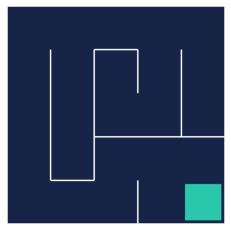

In [5]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [6]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [7]:
# create policy

# 5x5 possible state with 4 possible action in each state with equal probability
policy_probs = np.full((5, 5, 4), 0.25)

In [8]:
def policy(state):
    return policy_probs[state]

In [9]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


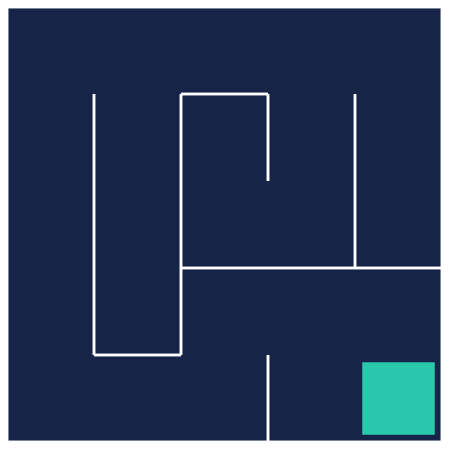

In [10]:
# test agent with random policy
test_agent(env, policy, episodes=1)

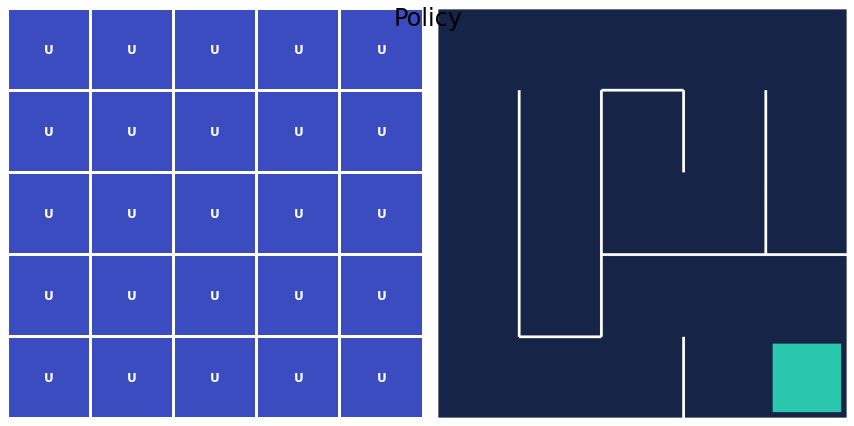

In [11]:
# plot policy
plot_policy(policy_probs, frame)

In [12]:
# intialize value table
state_values = np.zeros(shape=(5,5))

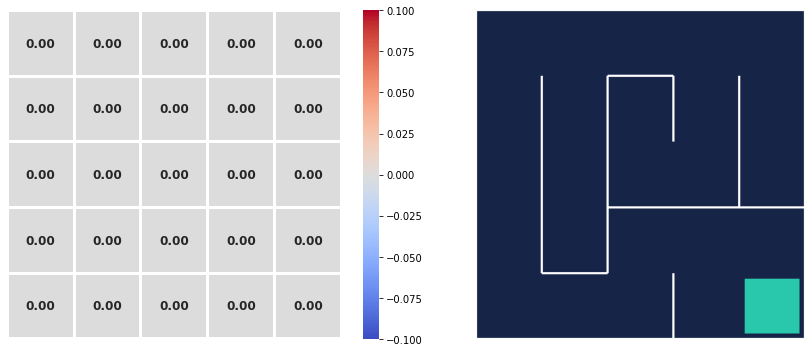

In [13]:
# plot state values
plot_values(state_values, frame)

# Policy Iteration Algorithm

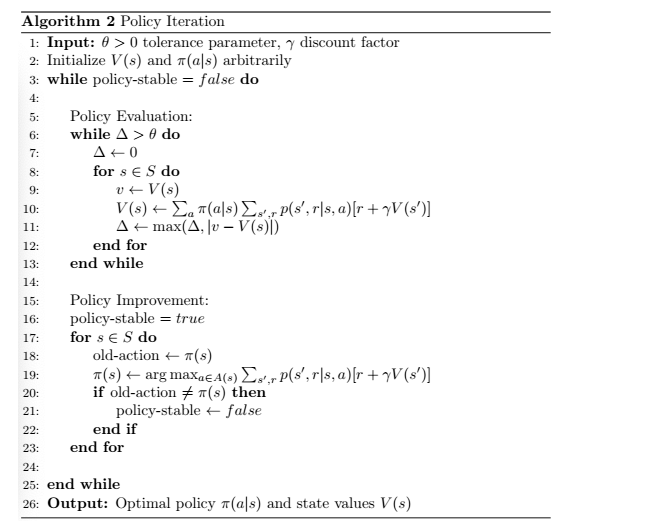

In [14]:
def policy_evaluation(policy_probs,state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")

    while delta > theta:
        delta = 0

        for row in range(5):
            for col in range(5):
                old_value = state_values[(row,col)]
                new_value = 0.

                action_probabilities = policy_probs[(row,col)]

                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row,col),action)
                    new_value = new_value  + prob * (reward + gamma * state_values[next_state])

                state_values[(row,col)] = new_value

                delta = max(delta, abs(old_value-new_value))

In [15]:
def policy_improvement(policy_probs, state_values, gamma=0.99):

    policy_stable = True

    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row,col)].argmax()

            new_action = None
            max_qsa = float("-inf")

            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row,col),action)
                qsa = reward + gamma * state_values[next_state]

                if qsa > max_qsa:
                    new_action = action
                    max_qsa = qsa
                
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.0
            policy_probs[(row,col)] = action_probs

            if new_action != old_action:
                policy_stable = False
    return policy_stable

In [16]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False


    while not policy_stable : 
        
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)

        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_probs, frame)



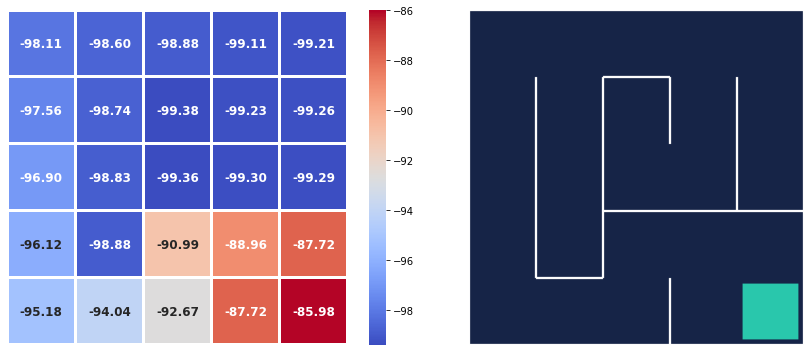

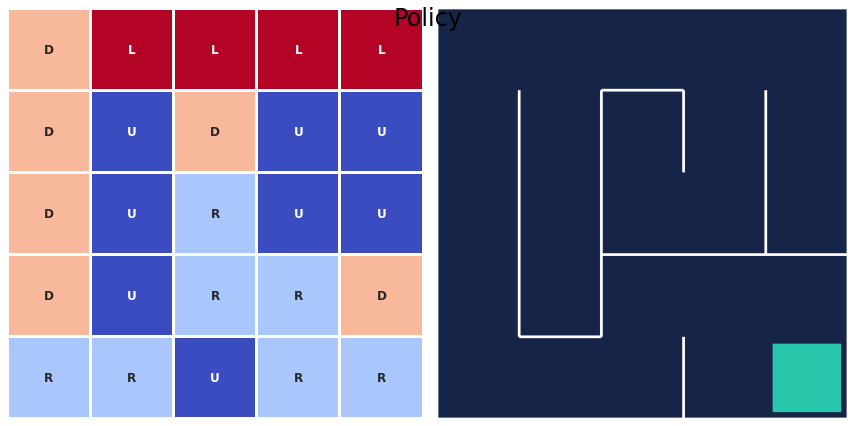

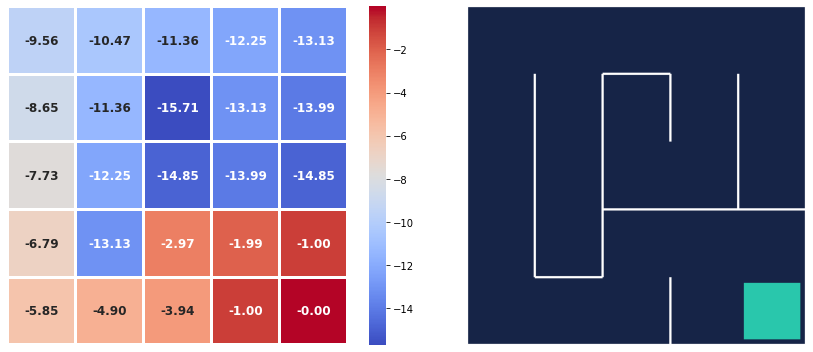

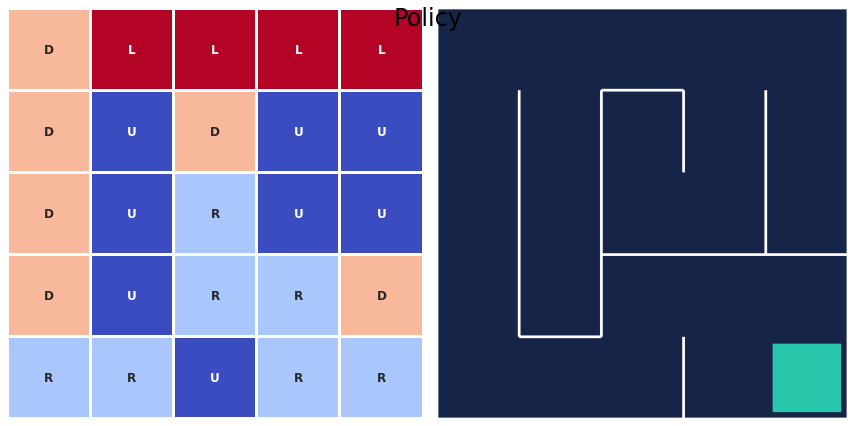

In [17]:
policy_iteration(policy_probs, state_values)

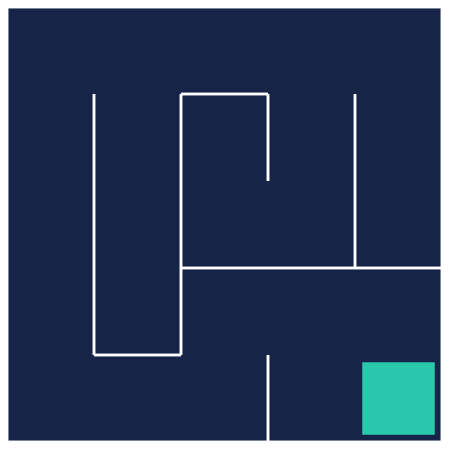

In [19]:
test_agent(env,policy, episodes=1)